In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
import re  #This library is regular expression operations
import os #for extracting the folder paths
import glob #for extracting the file paths from folders
from itertools import chain  #for flattening a list of lists into a single list
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
#Input the folder with the churn data
#C:\Users\Victor.Kulankash\OneDrive - NCBA Group PLC\Desktop\Models\Next Best Offer
nbo_txns_folder = "C:/Users/Victor.Kulankash/OneDrive - NCBA Group PLC/Desktop/Models/Next Best Offer/Next Best offer v3.xlsx"
print("Retrieving the file paths of Customer Data for next best offer prediction...")

#Retrieving the file paths of the Data
file_paths = glob.glob(nbo_txns_folder)

print("Importing the data on Customer Data Txns...")

#Importing the data on ELMA Mobile Banking Txns
nbo_data_txns_df = pd.concat([pd.read_excel(a ) 
                              for a in file_paths],ignore_index=True).dropna(how='all', axis=1)

print('The Data Import of Customer Data & Banking Txns is now done')
nbo_data_txns_df.sample(10)

Retrieving the file paths of Customer Data for next best offer prediction...
Importing the data on Customer Data Txns...
The Data Import of Customer Data & Banking Txns is now done


,CUSTOMER_ID,NAME,Segment,days since last CR,days since last DR,Customer Tenure,Txns YTD Sept 22,Txns YTD Sept 23,Txn Amount YTD Sept22,Txn Amount YTD Sept23,...,Open Banking Values,OCDs,OCD Txns,OCD Values,CDM,CDM Values,Lipa Na Mpesa,Lipa na Mpesa Values,Internet Banking,Mobile Transfer
440,744735,BAT SACCO LTD,1,2,6,3228,403,1423,74812343.5,3.165017e+08,...,0.0,0,0,0.0,0,0,1,12581728.0,1,1
28215,452443,GAFIRA ENTREPRISES LIMITED,0,23,23,1623,0,0,0.0,0.000000e+00,...,0.0,0,0,0.0,0,0,0,0.0,0,0
29264,472215,CONCORD EXPORTERS LIMITED,0,16,14,997,3,1,43200.0,1.085260e+05,...,0.0,0,0,0.0,0,0,1,62000.0,0,0
45342,781862,FAIM K. CONSTRUCTION COMPANY LTD,0,135,111,2624,0,9,0.0,6.800590e+06,...,0.0,0,0,0.0,0,0,0,0.0,0,0
44499,556264,KALBO ADVENTURES LIMITED,0,6,6,489,28,175,39211.0,2.558402e+06,...,0.0,0,0,0.0,0,0,1,100900.0,0,1
7925,346432,DONG LEE LIMITED,0,13,9,1932,90,85,2955564.0,2.426994e+06,...,0.0,0,0,0.0,0,0,0,0.0,0,0
47935,228581,FLYING DOVE TOURS & TRAVEL LTD,0,8,2,3710,74,160,2220377.0,2.743804e+06,...,0.0,0,0,0.0,0,0,1,140000.0,1,0
27051,423408,FAIRWORTH INVESTMENTS,0,126,40,1659,3,17,4600.0,1.727400e+05,...,0.0,0,0,0.0,0,0,0,0.0,0,1
22737,326555,GULLI CREATION EVENT AND SUPPLIER,0,7,2,2715,2,4,315.0,2.400000e+02,...,0.0,0,0,0.0,0,0,0,0.0,0,0
32820,542895,HOLY VISION WORSHIP CENTRE,0,2,14,546,1,5,1000.0,1.800000e+02,...,0.0,0,0,0.0,0,0,1,2740.0,0,0


In [3]:
nbo_data_txns_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49284 entries, 0 to 49283
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CUSTOMER_ID            49284 non-null  int64  
 1   NAME                   49284 non-null  object 
 2   Segment                49284 non-null  int64  
 3   days since last CR     49284 non-null  int64  
 4   days since last DR     49284 non-null  int64  
 5   Customer Tenure        49284 non-null  int64  
 6   Txns YTD Sept 22       49284 non-null  int64  
 7   Txns YTD Sept 23       49284 non-null  int64  
 8   Txn Amount YTD Sept22  49284 non-null  float64
 9   Txn Amount YTD Sept23  49284 non-null  float64
 10  Open Banking           49284 non-null  int64  
 11  Open Banking Txns      49284 non-null  int64  
 12  Open Banking Values    49284 non-null  float64
 13  OCDs                   49284 non-null  int64  
 14  OCD Txns               49284 non-null  int64  
 15  OC

In [4]:
nbo_data_txns_df = nbo_data_txns_df.drop('NAME', axis=1)

nbo_data_txns_df.sample(5)

,CUSTOMER_ID,Segment,days since last CR,days since last DR,Customer Tenure,Txns YTD Sept 22,Txns YTD Sept 23,Txn Amount YTD Sept22,Txn Amount YTD Sept23,Open Banking,...,Open Banking Values,OCDs,OCD Txns,OCD Values,CDM,CDM Values,Lipa Na Mpesa,Lipa na Mpesa Values,Internet Banking,Mobile Transfer
3369,770981,0,9,6,2781,298,296,1.286146e+08,2.038286e+08,0,...,0.0,0,0,0.0,0,0,0,0.0,1,0
45721,115309,0,2,2,5932,101,105,8.744975e+06,1.313624e+07,0,...,0.0,0,0,0.0,0,0,0,0.0,0,0
10373,561010,0,7,2,465,41,51,1.386500e+05,1.146486e+06,0,...,0.0,0,0,0.0,0,0,1,15000.0,0,0
28725,462539,0,2,6,1091,88,176,3.271222e+06,2.140872e+06,0,...,0.0,0,0,0.0,0,0,1,392300.0,1,0
41328,847106,0,89,1189,1338,0,0,0.000000e+00,0.000000e+00,0,...,0.0,0,0,0.0,0,0,0,0.0,0,0


In [5]:
nbo_data_txns_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49284 entries, 0 to 49283
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CUSTOMER_ID            49284 non-null  int64  
 1   Segment                49284 non-null  int64  
 2   days since last CR     49284 non-null  int64  
 3   days since last DR     49284 non-null  int64  
 4   Customer Tenure        49284 non-null  int64  
 5   Txns YTD Sept 22       49284 non-null  int64  
 6   Txns YTD Sept 23       49284 non-null  int64  
 7   Txn Amount YTD Sept22  49284 non-null  float64
 8   Txn Amount YTD Sept23  49284 non-null  float64
 9   Open Banking           49284 non-null  int64  
 10  Open Banking Txns      49284 non-null  int64  
 11  Open Banking Values    49284 non-null  float64
 12  OCDs                   49284 non-null  int64  
 13  OCD Txns               49284 non-null  int64  
 14  OCD Values             49284 non-null  float64
 15  CD

In [6]:
# Using 'LABEL' column  named 'Churn' and other features are in 'X' variable
X = nbo_data_txns_df.drop(columns=['CUSTOMER_ID'])
# y = churn_data_txns_df['Label'].map({'CHURN': 1, 'NOT CHURN': 0})  # Converting to binary format


In [7]:

# Step 3: Feature Scaling (Optional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Step 4: Dimensionality Reduction (Optional)
# If you have a large number of features, you might want to reduce dimensionality using techniques like PCA.
# This can help improve the performance of some clustering algorithms.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

C:\Users\Victor.Kulankash\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Victor.Kulankash\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Victor.Kulankash\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Victor.Kulankash\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicit

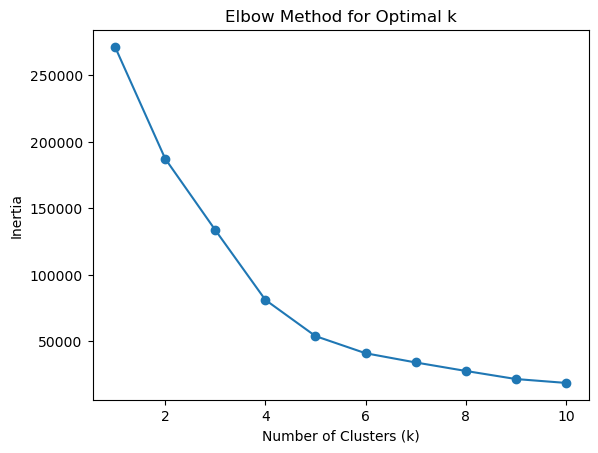

In [9]:
# Initialize an empty list to store inertia values
inertia_values = []

# Try different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [10]:
# Step 5: Clustering
# Choose the number of clusters (k) based on domain knowledge or use techniques like the Elbow Method to determine it.
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(X_pca)

C:\Users\Victor.Kulankash\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
# Assuming 'clusters' is the array containing cluster assignments for each customer.

# Add the cluster assignments to your DataFrame
nbo_data_txns_df['Cluster'] = clusters

# Now, you can analyze the characteristics of each cluster and make recommendations accordingly.

In [12]:
nbo_data_txns_df.sample(10)

,CUSTOMER_ID,Segment,days since last CR,days since last DR,Customer Tenure,Txns YTD Sept 22,Txns YTD Sept 23,Txn Amount YTD Sept22,Txn Amount YTD Sept23,Open Banking,...,OCDs,OCD Txns,OCD Values,CDM,CDM Values,Lipa Na Mpesa,Lipa na Mpesa Values,Internet Banking,Mobile Transfer,Cluster
41803,856688,0,104,78,1234,1,1,442136.64,60.0,0,...,0,0,0.0,0,0,0,0.0,0,0,2
15242,795559,0,9,2,2332,16,100,271580.00,1625169.0,0,...,0,0,0.0,0,0,1,65000.0,0,0,0
31907,523249,0,26,20,647,2,11,250600.00,180270.0,0,...,0,0,0.0,0,0,0,0.0,0,1,0
25213,387505,0,35,20,2666,2,12,16460.00,78170.0,0,...,0,0,0.0,0,0,0,0.0,1,0,2
4941,560210,0,2,2,469,11,1403,16800.00,4226588.0,0,...,0,0,0.0,0,0,1,615750.0,0,1,0
3810,588350,0,6,2,338,0,424,0.00,15564433.5,0,...,0,0,0.0,0,0,1,580000.0,0,1,0
48857,538553,0,9,2,569,240,495,1584081.00,4664270.0,0,...,0,0,0.0,0,0,1,267200.0,0,1,0
45478,828597,0,9,2,1472,135,56,5958348.00,2587115.0,0,...,0,0,0.0,0,0,1,133501.0,0,1,0
41988,860265,0,16,13,1204,5,14,37400.00,113710.0,0,...,0,0,0.0,0,0,1,6150.0,0,1,0
45085,641750,0,79,49,122,0,0,0.00,1090.0,0,...,0,0,0.0,0,0,0,0.0,0,0,2


In [13]:
# Get distinct values in 'Column1'
distinct_values = nbo_data_txns_df['Cluster'].unique()

print(distinct_values)

[1 5 0 2 3 4]


In [14]:
# Get the count of each distinct value in the 'Category' column
count_per_value = nbo_data_txns_df['Cluster'].value_counts()
print(count_per_value)

0    25042
2    21244
4     2822
5      157
1       18
3        1
Name: Cluster, dtype: int64


In [14]:
## Using a different clustering Algorithm (DBSCAN) 
## which does not require us to find an optimum number of clusters such as in K-Means and in Agglomerative Clustering

In [15]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Assuming 'X' contains your feature matrix

# Step 1: Preprocess Data (if necessary)
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Step 2: DBSCAN Clustering
dbscan = DBSCAN(eps=0.8, min_samples=10)
cluster_labels = dbscan.fit_predict(X_scaled)

# Step 3: Analyze the Clusters
# -1 represents noise points, while other integers represent cluster labels.



In [16]:
# If you want to see how many clusters were created (excluding noise points):
unique_clusters = set(cluster_labels)
num_clusters = len(unique_clusters) - (1 if -1 in unique_clusters else 0)

print(f'Number of clusters (excluding noise points): {num_clusters}')

Number of clusters (excluding noise points): 18


In [17]:
# Add the cluster labels to your original dataset
nbo_data_txns_df['Cluster2_DBSCAN'] = cluster_labels

In [18]:
nbo_data_txns_df.sample(10)

,CUSTOMER_ID,Segment,days since last CR,days since last DR,Customer Tenure,Txns YTD Sept 22,Txns YTD Sept 23,Txn Amount YTD Sept22,Txn Amount YTD Sept23,Open Banking,...,OCD Txns,OCD Values,CDM,CDM Values,Lipa Na Mpesa,Lipa na Mpesa Values,Internet Banking,Mobile Transfer,Cluster,Cluster2_DBSCAN
30232,490428,0,28,26,856,3,47,0.00,7.718800e+04,0,...,0,0.0,0,0,1,18330.0,0,0,0,10
258,740781,0,2,6,3290,1726,2517,96108536.16,1.194019e+08,0,...,0,0.0,0,0,1,4491346.0,1,1,0,1
49028,747129,0,2,2,3178,439,302,25404508.00,1.503584e+07,0,...,0,0.0,0,0,0,0.0,1,1,0,5
1503,791169,0,2,2,2423,244,244,89840283.50,4.207771e+07,0,...,0,0.0,0,0,1,5192096.0,1,1,0,1
32606,538377,0,2,2,569,2,6,1000.00,4.580000e+04,0,...,0,0.0,0,0,1,72000.0,0,0,0,10
8584,595953,0,105,33,300,0,47,0.00,3.448570e+05,0,...,0,0.0,0,0,0,0.0,0,1,0,8
20019,241994,0,408,755,3417,0,0,0.00,0.000000e+00,0,...,0,0.0,0,0,0,0.0,0,0,4,12
23978,356859,0,7,19,2551,37,30,408725.00,3.635950e+05,0,...,0,0.0,0,0,1,24000.0,0,1,0,9
21933,307351,0,61,525,2740,2,0,545012.00,0.000000e+00,0,...,0,0.0,0,0,0,0.0,0,0,2,12
39294,778662,0,26,22,2677,4,4,17402.00,6.800000e+02,0,...,0,0.0,0,0,0,0.0,0,0,2,12


## Using Algomerative clustering

In [19]:
### Using X_pca 

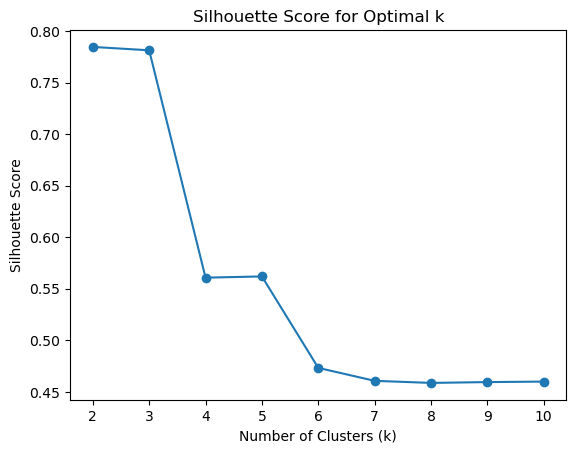

In [27]:

import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Assuming 'X_pca' contains your transformed features

# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Try different values of k
for k in range(2, 11):
    agglomerative = AgglomerativeClustering(n_clusters=k)
    cluster_labels = agglomerative.fit_predict(X_pca)
    silhouette_scores.append(silhouette_score(X_pca, cluster_labels))

# Plot the Silhouette Scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()


In [39]:
# Choose the number of clusters with the highest silhouette score
optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 5  # Adding 2 because range starts from 2

agglomerative = AgglomerativeClustering(n_clusters=optimal_num_clusters)
cluster_labels = agglomerative.fit_predict(X_scaled)


In [40]:
# Step 5: Add Cluster Labels to Original DataFrame

nbo_data_txns_df['Cluster_Agglom_X_pca2'] = cluster_labels

In [41]:
nbo_data_txns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49284 entries, 0 to 49283
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CUSTOMER_ID            49284 non-null  int64  
 1   Segment                49284 non-null  int64  
 2   Cust Tenure            49284 non-null  int64  
 3   Txns YTD July 22       49284 non-null  int64  
 4   Txns YTD July 23       49284 non-null  int64  
 5   Avg Balance Jan 23     49284 non-null  float64
 6   Avg Balance Jun 23     49284 non-null  float64
 7   BANKERS CHEQUE         49284 non-null  int64  
 8   BULK OTC               49284 non-null  int64  
 9   BULK TRANSFER          49284 non-null  int64  
 10  DIRECT DEBIT           49284 non-null  int64  
 11  EFT                    49284 non-null  int64  
 12  Inhouse Cheque         49284 non-null  int64  
 13  Internal Transfer      49284 non-null  int64  
 14  Inward Clg Cheque      49284 non-null  int64  
 15  Ke

In [42]:
nbo_data_txns_df.sample(10)

,CUSTOMER_ID,Segment,Cust Tenure,Txns YTD July 22,Txns YTD July 23,Avg Balance Jan 23,Avg Balance Jun 23,BANKERS CHEQUE,BULK OTC,BULK TRANSFER,...,Pesalink,RTGS,STANDING ORDER,TT,TT/RTGS,BULK TRANSFERS,Cluster,Cluster2_DBSCAN,Cluster_Agglom_X_pca,Cluster_Agglom_X_pca2
13245,471695,0,964,105,10,0.000000e+00,0.000000e+00,0,0,0,...,0,1,0,0,0,1,0,90,0,1
17915,176450,0,4680,0,2,4.319737e+04,4.428267e+01,0,0,0,...,0,0,0,0,0,0,2,121,0,3
20727,266248,0,3854,121,67,2.586551e+04,2.045559e+04,0,0,0,...,1,0,0,0,0,0,0,191,0,1
49124,569414,0,385,0,267,1.839265e+03,3.844110e+03,0,0,0,...,0,0,0,0,0,0,0,126,0,3
988,779195,0,2631,177,196,1.260033e+04,1.077676e+05,0,0,1,...,1,0,0,0,0,1,1,-1,1,0
1422,782053,1,2581,102,87,1.031611e+06,6.802001e+05,0,0,1,...,0,0,0,0,0,1,4,-1,1,0
9449,320668,1,186,96,119,7.357741e+06,5.333391e+06,0,0,0,...,0,0,0,1,1,1,1,-1,0,1
3748,503819,0,733,6,153,9.271475e+04,1.716117e+03,0,0,0,...,1,0,0,0,0,1,0,2,0,1
8545,584928,0,313,0,43,3.942018e+05,9.424404e+05,0,0,0,...,1,1,0,0,0,1,1,-1,0,1
39639,796203,0,2274,69,1,5.082000e+01,1.326000e+03,0,0,0,...,0,0,0,0,0,0,2,148,0,3


In [44]:
# Get distinct values in 'Column1'
distinct_values = nbo_data_txns_df['Cluster_Agglom_X_pca2'].unique()

print(distinct_values)

[0 1 4 2 3]


In [ ]:
### Using X_scaled - More computationally tasking for aglomerative clustering

import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Assuming 'X_scaled' contains your transformed features

# Initialize an empty list to store silhouette scores
silhouette_scores = []

# Try different values of k
for k in range(2, 11):
    agglomerative = AgglomerativeClustering(n_clusters=k)
    cluster_labels = agglomerative.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

# Plot the Silhouette Scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()


In [ ]:
# Choose the number of clusters with the highest silhouette score
optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Adding 2 because range starts from 2

agglomerative = AgglomerativeClustering(n_clusters=optimal_num_clusters)
cluster_labels = agglomerative.fit_predict(X_scaled)


In [ ]:
# Step 5: Add Cluster Labels to Original DataFrame

nbo_data_txns_df['Cluster_Agglom_X_scaled'] = cluster_labels

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Step 3: Feature Scaling (Optional)
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Step 4: Agglomerative Clustering
# Determine the optimal number of clusters using the Silhouette Score
silhouette_scores = []

# Try different values of k
for k in range(2, 11):
    agglomerative = AgglomerativeClustering(n_clusters=k)
    cluster_labels = agglomerative.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, cluster_labels))

# Choose the number of clusters with the highest silhouette score
optimal_num_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Adding 2 because range starts from 2

agglomerative = AgglomerativeClustering(n_clusters=optimal_num_clusters)
cluster_labels = agglomerative.fit_predict(X_scaled)

# Step 5: Add Cluster Labels to DataFrame
nbo_data_txns_df['Cluster3_Aglom_X_scaled'] = cluster_labels


In [29]:
nbo_data_txns_df.sample(10)

,CUSTOMER_ID,Segment,Cust Tenure,Txns YTD July 22,Txns YTD July 23,Avg Balance Jan 23,Avg Balance Jun 23,BANKERS CHEQUE,BULK OTC,BULK TRANSFER,...,NAIROBI WATER.1,Outward Cheque - Dr,Pesalink,RTGS,STANDING ORDER,TT,TT/RTGS,BULK TRANSFERS,Cluster,Cluster2_DBSCAN
32372,533463,0,159,3,5,3.728901e+04,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,2,198
27717,436751,0,553,315,69,1.312552e+03,22967.576333,0,0,0,...,0,0,0,0,0,0,0,0,2,222
44899,634379,0,32,0,0,0.000000e+00,400.000000,0,0,0,...,0,0,0,0,0,0,0,0,2,193
41800,856630,0,1201,0,0,0.000000e+00,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,2,195
5020,643078,0,5413,143,200,1.021063e+06,879807.858333,0,0,0,...,0,1,0,1,0,1,0,1,1,-1
41356,847757,0,102,0,20,0.000000e+00,6904.133333,0,0,0,...,0,0,0,0,0,0,0,0,2,242
46064,365802,0,2196,0,0,1.212900e+03,2989.700000,0,0,0,...,0,0,0,0,0,0,0,0,2,193
35563,601924,0,237,0,39,6.479419e+03,23654.703333,0,0,0,...,0,0,0,0,0,0,0,0,2,222
33450,558250,0,441,8,63,0.000000e+00,0.000000,0,0,0,...,0,0,0,0,0,0,0,0,2,222
40657,830553,0,1419,0,0,2.604895e+04,23948.500000,0,0,0,...,0,0,0,0,0,0,0,0,2,195


In [26]:
#Saving the table to local drive
nbo_data_txns_df.to_csv('C:/Users/Victor.Kulankash/OneDrive - NCBA Group PLC/Desktop/Notebooks Outputs/NextBestOfferModelOutput.csv')

In [25]:
nbo_data_txns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49284 entries, 0 to 49283
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUSTOMER_ID          49284 non-null  int64  
 1   Segment              49284 non-null  int64  
 2   Cust Tenure          49284 non-null  int64  
 3   Txns YTD July 22     49284 non-null  int64  
 4   Txns YTD July 23     49284 non-null  int64  
 5   Avg Balance Jan 23   49284 non-null  float64
 6   Avg Balance Jun 23   49284 non-null  float64
 7   BANKERS CHEQUE       49284 non-null  int64  
 8   BULK OTC             49284 non-null  int64  
 9   BULK TRANSFER        49284 non-null  int64  
 10  DIRECT DEBIT         49284 non-null  int64  
 11  EFT                  49284 non-null  int64  
 12  Inhouse Cheque       49284 non-null  int64  
 13  Internal Transfer    49284 non-null  int64  
 14  Inward Clg Cheque    49284 non-null  int64  
 15  Kenya Power          49284 non-null 

In [ ]:
# Step 6: Make Recommendations within Each Cluster
for cluster_id in range(optimal_num_clusters):
    cluster_data = customer_data[nbo_data_txns_df['Cluster3_Aglom_X_scaled'] == cluster_id]
    # Implement your recommendation logic for this specific cluster based on their characteristics.

# Step 7: Analyze and Implement Recommendations
# Analyze the recommendations for each cluster and implement them as needed.

In [ ]:
# Using X_pca

In [24]:
import matplotlib.pyplot as plt

# Assuming X_pca has been computed

# Scatter plot of the first two principal components
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components')
plt.colorbar(label='Cluster')
plt.show()

NameError: name 'clusters' is not defined

In [ ]:
# import pandas as pd
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA

# Assuming 'customer_data' is your DataFrame with necessary customer details and product usage information.

# Step 1: Preprocess Data
# Apply one-hot encoding to the categorical variables if necessary.
# Standardize numerical variables (optional but can be beneficial for some algorithms).
# Perform any necessary data cleaning and handling of missing values.

# Step 2: Feature Selection
# Prepare your feature matrix (X) containing necessary customer details and product usage.

# Step 3: Feature Scaling (Optional)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Dimensionality Reduction (Optional)
# If you have a large number of features, you might want to reduce dimensionality using techniques like PCA.
# This can help improve the performance of some clustering algorithms.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Clustering
# Choose the number of clusters (k) based on domain knowledge or use techniques like the Elbow Method to determine it.
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Step 6: Interpret the Clusters
# Analyze the clusters to understand the characteristics of customers in each cluster.
# This can help in making personalized recommendations for each group.

# Step 7: Making Recommendations
# Once you have identified the clusters, you can recommend products to customers based on their cluster's preferences.


In [5]:
# Using 'LABEL' column  named 'Churn' and other features are in 'X' variable
X = churn_data_txns_df.drop(columns=['CUSTOMER_ID', 'Label'])  
y = churn_data_txns_df['Label'].map({'CHURN': 1, 'NOT CHURN': 0})  # Converting to binary format


In [10]:
# Step 2: Target Variable
# 'y' is already converted to binary format.

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Selection
model = RandomForestClassifier(random_state=42)  # Random Forest Classifier

# Step 5: Model Training
model.fit(X_train, y_train)

# Step 6: Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC Score: {roc_auc:.4f}")

# Step 7: Predict Probability of Churn
y_prob_churn = model.predict_proba(X_test)[:, 1]
print(y_prob_churn)


Accuracy: 0.9829
Precision: 0.9976
Recall: 0.9444
F1 Score: 0.9703
ROC-AUC Score: 0.9717
[0.02 0.03 0.45 ... 0.01 1.   0.23]


In [7]:

from sklearn.metrics import accuracy_score, classification_report

# Step 8: Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      5307
           1       1.00      0.94      0.97      2229

    accuracy                           0.98      7536
   macro avg       0.99      0.97      0.98      7536
weighted avg       0.98      0.98      0.98      7536



In [ ]:
# # Sample new customer data (Replace this with your actual data for new customers)
# new_customers = {
#     'CustomerID': [11, 12, 13],
#     'Age': [27, 39, 41],
#     'NumTransactions': [7, 3, 9],
#     'CustomerSupportCalls': [1, 2, 0],
# }

# df_new_customers = pd.DataFrame(new_customers)

# # Separate features (X) for new customer data
# X_new_customers = df_new_customers.drop('CustomerID', axis=1)

# # Train the Random Forest classifier
# rf_classifier = RandomForestClassifier()
# rf_classifier.fit(X_train, y_train)

# # Make predictions on new customer data
# churn_predictions = rf_classifier.predict(X_new_customers)

# # Add the predictions to the new customer dataframe
# df_new_customers['ChurnPrediction'] = churn_predictions

# # Display the results
# print("New Customer Data with Churn Predictions:")
# print(df_new_customers)